In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import pandas as pd

import sys
sys.path.insert(1, '../scripts/')

from ellipse import *

import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
import vg
%matplotlib notebook
plt.style.use('notebook')
from os import path
from glob import glob


def geometry_analysis(dataframe):
    t = dataframe.index.to_numpy()
    
    # calculate deflection
    deflection = calc_deflection(dataframe.pos_x.to_numpy(), dataframe.pos_z.to_numpy())
    """
    dataframe.insert(loc=len(dataframe.columns),
                     column='deflection',
                     value=deflection,
                    )
    """
    # find max an min deflection
    max_deflection_i, max_deflection_t, max_deflection = find_max_deflection(t, deflection)
    min_deflection_i, min_deflection_t, min_deflection = find_min_deflection(t, deflection)
    
    # calculate angles
    max_deflection_angles_t, max_deflection_angles = calc_max_deflection_angles(t, max_deflection_i, d.pos_x, d.pos_z, skip_odd=False)
    
    # calculate p2p angles
    p2p_t, p2p_angles = calc_p2p_angles(dataframe.pos_x.to_numpy(), 
                                        dataframe.pos_z.to_numpy(), 
                                        max_deflection_i, 
                                        max_deflection_t,
                                       )
    
    # calculate orbit shape parameters
    ratio_t, ratio, eccentricity = calc_axis_ratio(min_deflection_t, 
                                                   min_deflection, 
                                                   max_deflection_t, 
                                                   max_deflection)
    
    # build dataframes
    ratio_df = pd.DataFrame({'axis_ratio' : ratio, 
                             'eccentricity' : eccentricity}, 
                            index = ratio_t, 
                           )
    
    deflection_df = pd.DataFrame({'max_deflection' : max_deflection, 
                                  'max_deflection_index' : max_deflection_i,
                                 },
                                 index=max_deflection_t
                                )
    
    angle_df = pd.DataFrame({'axis_angle' : max_deflection_angles,
                            }, 
                            index = max_deflection_angles_t
                           )

    p2p_df = pd.DataFrame({'p2p_angle' : p2p_angles,
                          }, 
                          index = p2p_t
                         )
    
    # merge DataFrame and return
    geometry_df = pd.merge(ratio_df, deflection_df, left_index=True, right_index=True)
    geometry_df = pd.merge(geometry_df, angle_df, left_index=True, right_index=True)
    geometry_df = pd.merge(geometry_df, p2p_df, left_index=True, right_index=True)
    
    return(geometry_df)

def plot_geometry_analysis(orbit_df, geometry_df):

    _, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=1, nrows=4, figsize=(9,12))
    ax1.plot(orbit_df.pos_x, 
             orbit_df.pos_z, 
             label='orbit')
    
    ax1.scatter(orbit_df.pos_x[geometry_df.max_deflection_index], 
                orbit_df.pos_z[geometry_df.max_deflection_index], 
                color='tab:red', 
                label='maxima')
    
    ax1.axis('equal')
    ax1.legend(loc='upper right')

    ax2.plot(orbit_df.pos_x, label='pos x')
    ax2.plot(orbit_df.pos_z, label='pos z')
    ax2.plot(orbit_df.deflection, label='deflection')
    
    ax2.plot(geometry_df.max_deflection, color='grey', alpha=0.5)
    ax2.legend(loc='lower center', ncol=3)
    ax2.set_xticklabels([])
    ax2.get_shared_x_axes().join(ax2, ax3)

    ax3.plot(geometry_df.axis_angle, label='main axis angle')
    ax3.plot(geometry_df.p2p_angle, label='p2p angle')
    ax3.set_ylim([0, 180])
    ax3.legend(loc='lower center')
    ax3.set_xticklabels([])
    ax3.get_shared_x_axes().join(ax3, ax4)

    ax4.plot(geometry_df.axis_ratio, label='elipse axis ratio')
    ax4.plot(geometry_df.eccentricity, label='eccentricity')
    ax4.legend(loc='lower center', ncol=2)

In [2]:
data = pd.read_pickle('../tests/BW73_helihoist_filtered_integrated.pickle')

<IPython.core.display.Javascript object>


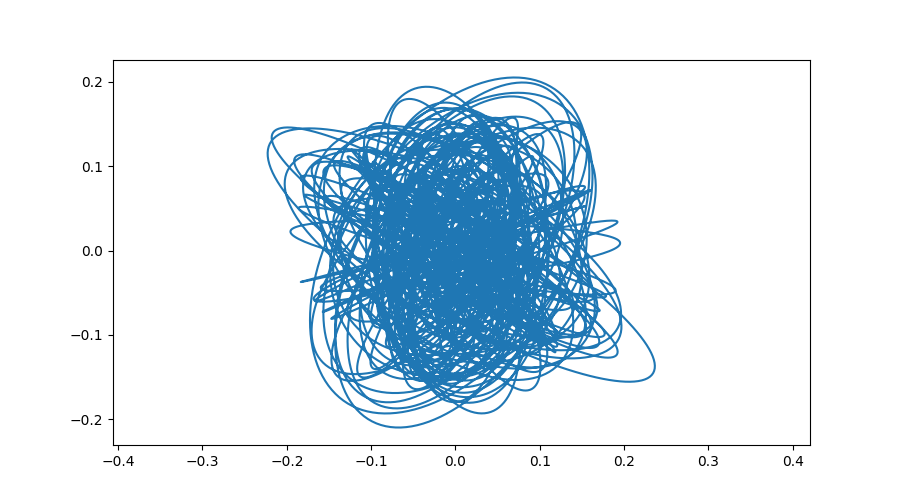

(-0.2456684768621306,
 0.2594338864469658,
 -0.23051706333732966,
 0.22604557907426034)

In [3]:
start = '2019-11-05 12:30:00 +01:00'
end = '2019-11-05 12:40:00 +01:00'

plt.figure()

plt.plot(data[start:end].pos_x, data[start:end].pos_z)

plt.axis('equal')

2019-11-05 12:30:00+01:00
omitting last element


<IPython.core.display.Javascript object>


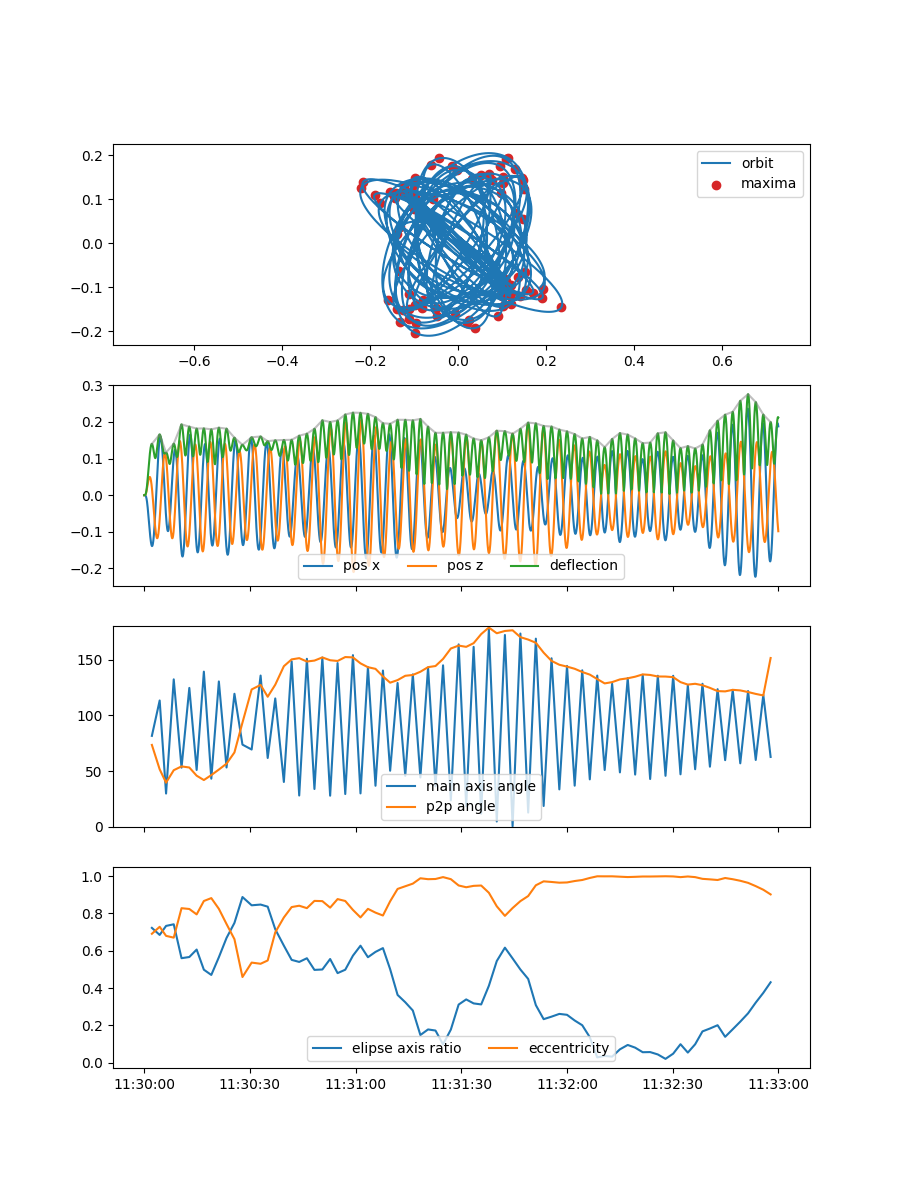

2019-11-05 12:33:00+01:00
omitting last element
min index comes first, removing


<IPython.core.display.Javascript object>


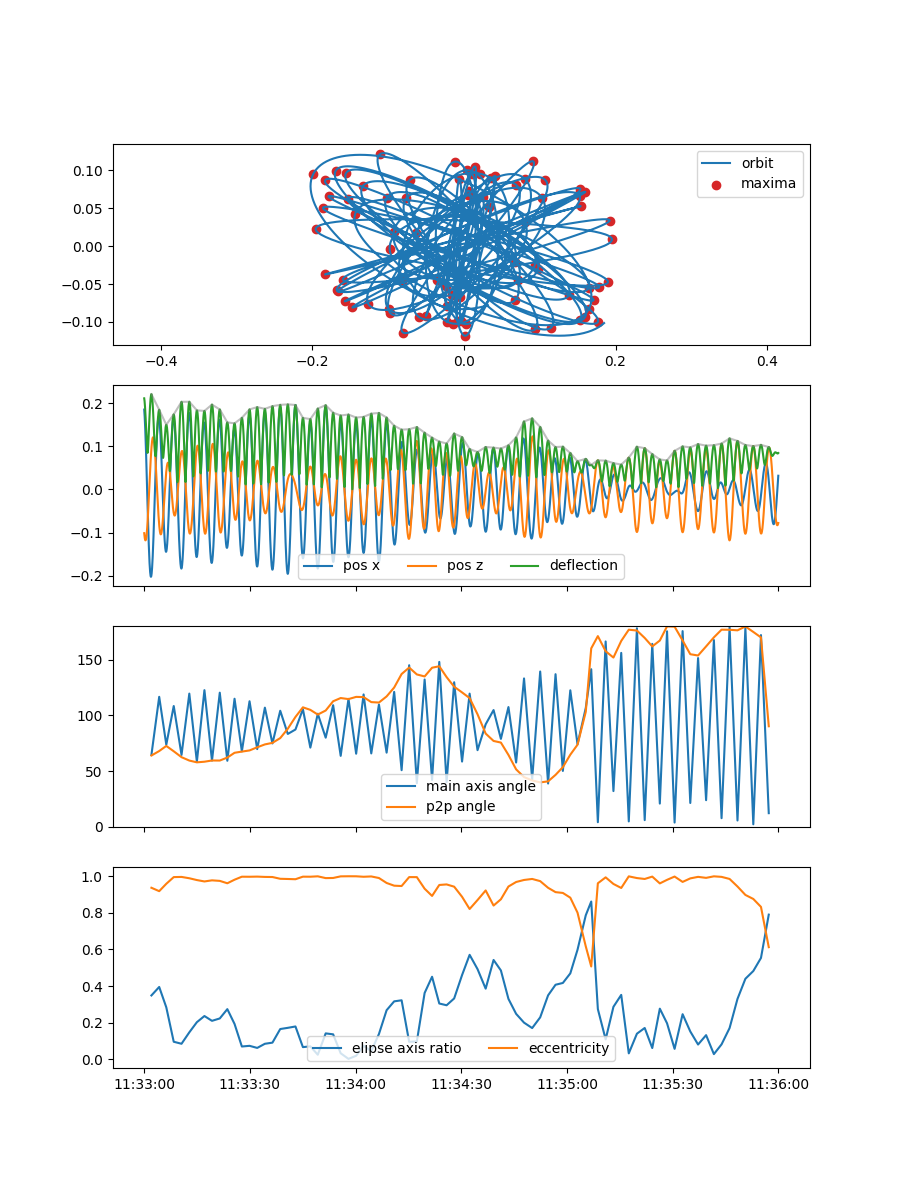

2019-11-05 12:36:00+01:00


<IPython.core.display.Javascript object>


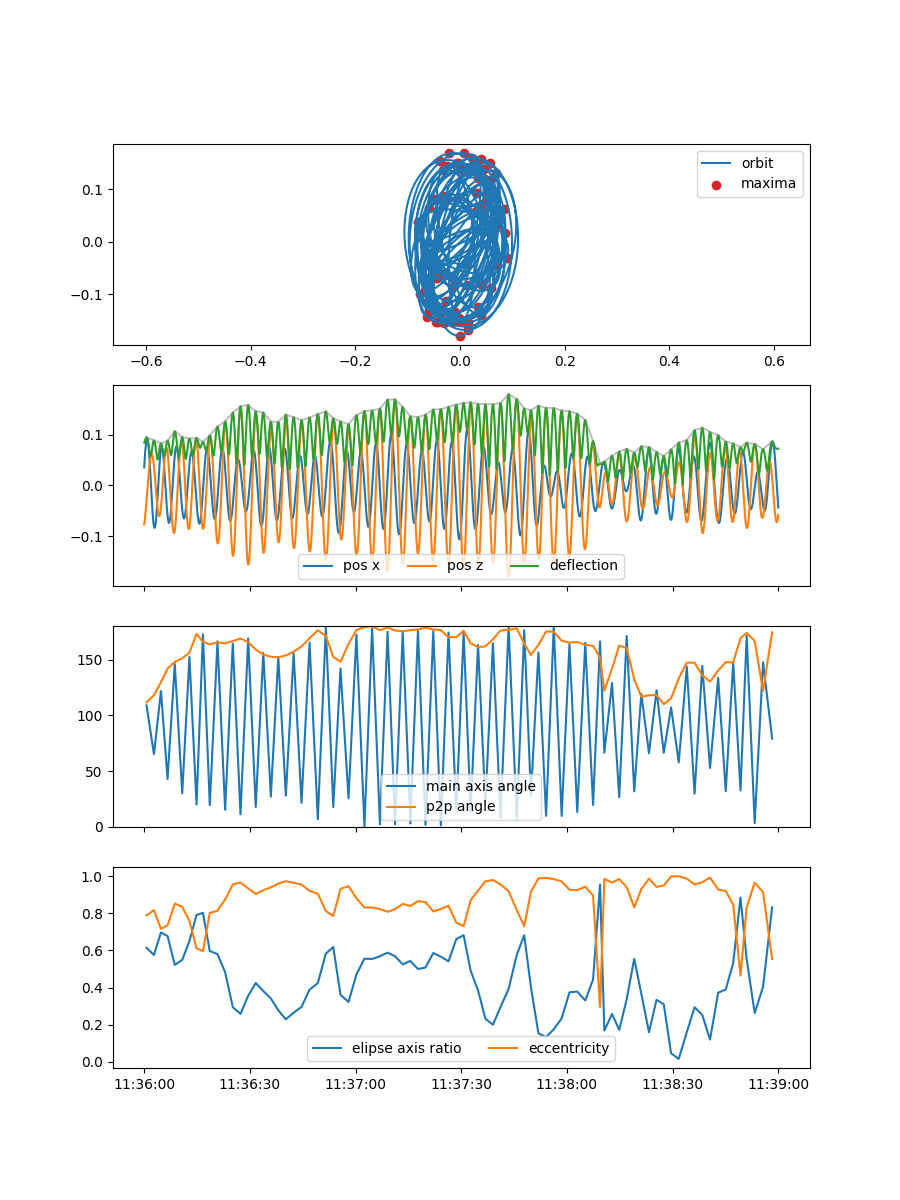

2019-11-05 12:39:00+01:00


<IPython.core.display.Javascript object>


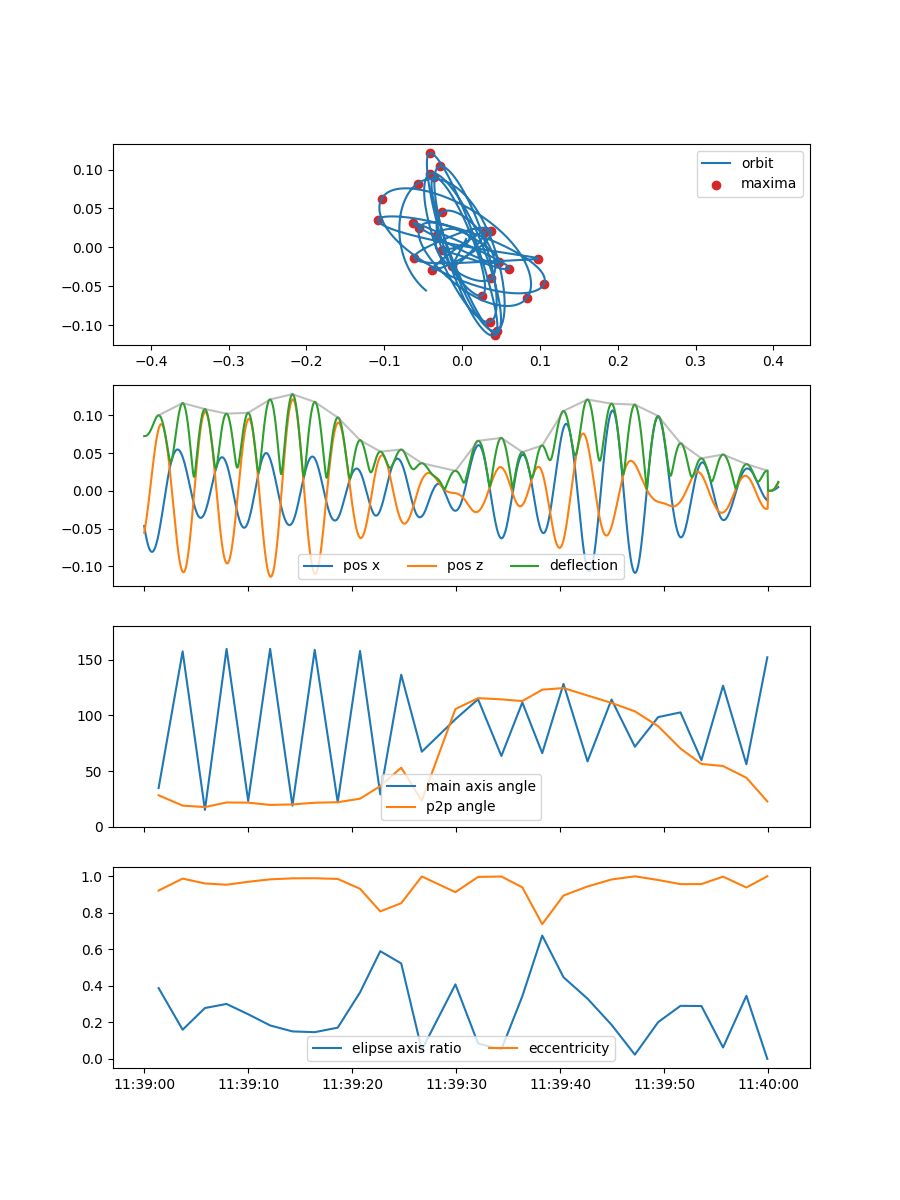

In [4]:
for t, d in data[start:end].resample('3min'):
    print(t)
    geometry_df = geometry_analysis(d)
    plot_geometry_analysis(d, geometry_df)
    

min index comes first, removing


<IPython.core.display.Javascript object>


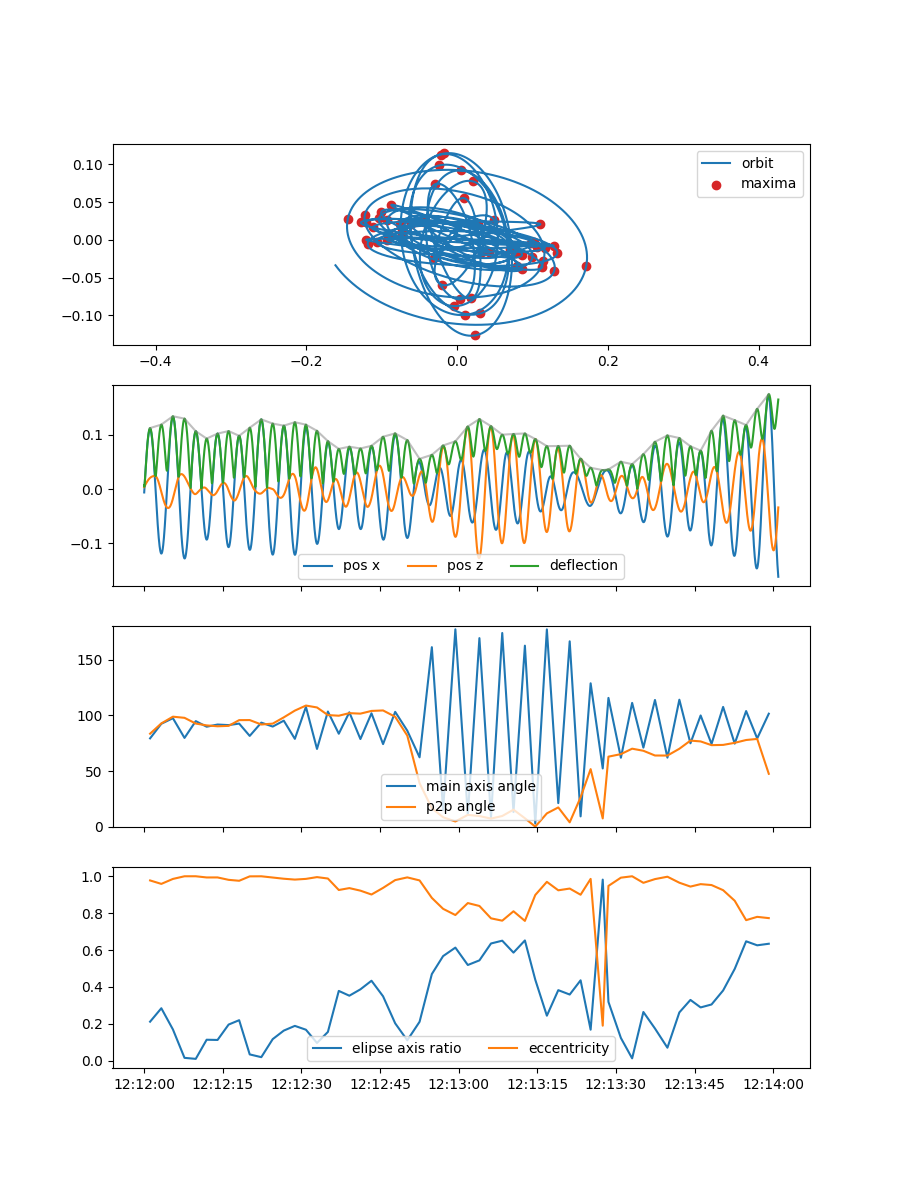

In [117]:
geometry_df = geometry_analysis(d)
plot_geometry_analysis(d, geometry_df)

<IPython.core.display.Javascript object>


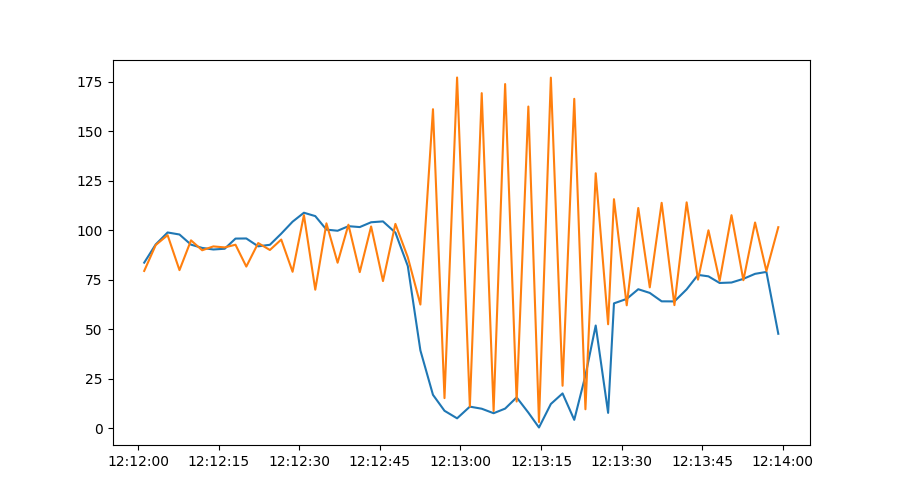

In [114]:
plt.figure()
plt.plot(geometry_df.p2p_angle)
plt.plot(geometry_df.axis_angle)
plt.show()